In [91]:
import pathlib
import re

from tqdm.notebook import tqdm
import numpy as np
import matplotlib.pyplot as plt
import yaml

import texture_strength_comparison_functions as functions

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load YAML file

The file paths and user inputs for the analysis of the DESY 2020 and DESY 2021 experiments are included in the `yaml` configuration files, to record the inputs of the analysis.

The information in the `yaml` file can be accessed like this.

In [92]:
# to load the DESY 2021 analysis
config_path = "yaml/config_desy_2020_multihit.yaml"
config = functions.get_config(config_path)

## Analysing texture changes for the `DESY 2020` and `DESY 2021` experiments with Fourier Peak Analysis

Load the **${\alpha}$-phase** texture strengths for the data refined using direct intensities from Continuous-Peak-Fit using Fourier peak analysis and write the results to new arrays.

In [94]:
cpf_alpha_results = functions.load_sxrd_cpf_alpha_multihit(config_path)

The SXRD experiment number is: 
18

The multi-hit stage numbers are: 
[1, 2, 3, 4, 5]

The image numbers at the end of each stage are: 
[2007, 515, 514, 514, 2275]

The SXRD results file is: 
../../SXRD_results/desy_2020/experiment18b-deformation/fourier-peak-analysis-texture/18b-stage-1-raw-intensities/alpha/18_texture_strength.txt

The SXRD results file is: 
../../SXRD_results/desy_2020/experiment18b-deformation/fourier-peak-analysis-texture/18b-stage-2-raw-intensities/alpha/18_texture_strength.txt

The SXRD results file is: 
../../SXRD_results/desy_2020/experiment18b-deformation/fourier-peak-analysis-texture/18b-stage-3-raw-intensities/alpha/18_texture_strength.txt

The SXRD results file is: 
../../SXRD_results/desy_2020/experiment18b-deformation/fourier-peak-analysis-texture/18b-stage-4-raw-intensities/alpha/18_texture_strength.txt

The SXRD results file is: 
../../SXRD_results/desy_2020/experiment18b-deformation/fourier-peak-analysis-texture/18b-stage-5-raw-intensities/alpha/18_te

Load the **${\beta}$-phase** texture strengths for the data refined using direct intensities from Continuous-Peak-Fit using Fourier peak analysis and write the results to new arrays.

In [95]:
cpf_beta_results = functions.load_sxrd_cpf_beta_multihit(config_path)

The SXRD experiment number is: 
18

The multi-hit stage numbers are: 
[1, 2, 3, 4, 5]

The image numbers at the end of each stage are: 
[2007, 515, 514, 514, 2275]

The SXRD results file is: 
../../SXRD_results/desy_2020/experiment18b-deformation/fourier-peak-analysis-texture/18b-stage-1-raw-intensities/beta/18_texture_strength.txt

The SXRD results file is: 
../../SXRD_results/desy_2020/experiment18b-deformation/fourier-peak-analysis-texture/18b-stage-2-raw-intensities/beta/18_texture_strength.txt

The SXRD results file is: 
../../SXRD_results/desy_2020/experiment18b-deformation/fourier-peak-analysis-texture/18b-stage-3-raw-intensities/beta/18_texture_strength.txt

The SXRD results file is: 
../../SXRD_results/desy_2020/experiment18b-deformation/fourier-peak-analysis-texture/18b-stage-4-raw-intensities/beta/18_texture_strength.txt

The SXRD results file is: 
../../SXRD_results/desy_2020/experiment18b-deformation/fourier-peak-analysis-texture/18b-stage-5-raw-intensities/beta/18_texture

### Plotting the ${\alpha}$ and ${\beta}$ texture changes during the `DESY 2020` and `DESY 2021` experiments from Fourier Peak Analysis

The texture strength changes in both the ${\alpha}$ and ${\beta}$ phases can be plotted together, over time, versus image number. Using the Fourier peak analysis we can capture some very interesting changes in both the the ${\alpha}$ and the ${\beta}$ texture during a range of different high temperature deformation and high temperature annealing experiments.

The SXRD experiment number is: 
18

The output folder is: 
../../SXRD_results/desy_2020/texture_strength/

Figure saved to: ../../SXRD_results/desy_2020/texture_strength/cpf/018_texture_index_cpf.png
Figure saved to: ../../SXRD_results/desy_2020/texture_strength/cpf/018_odf_max_cpf.png


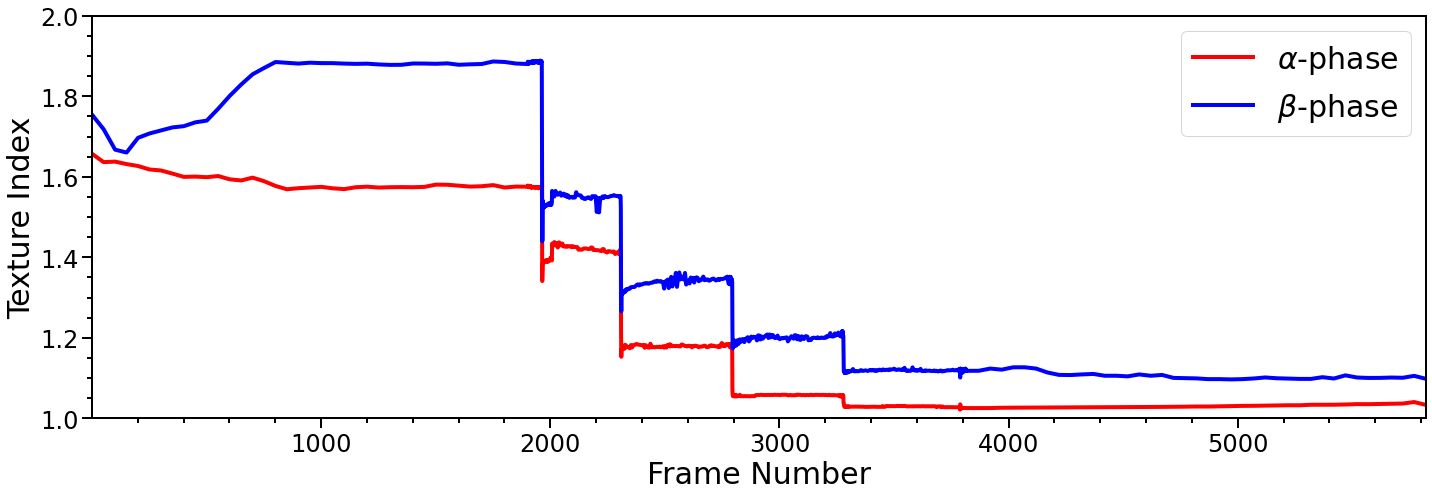

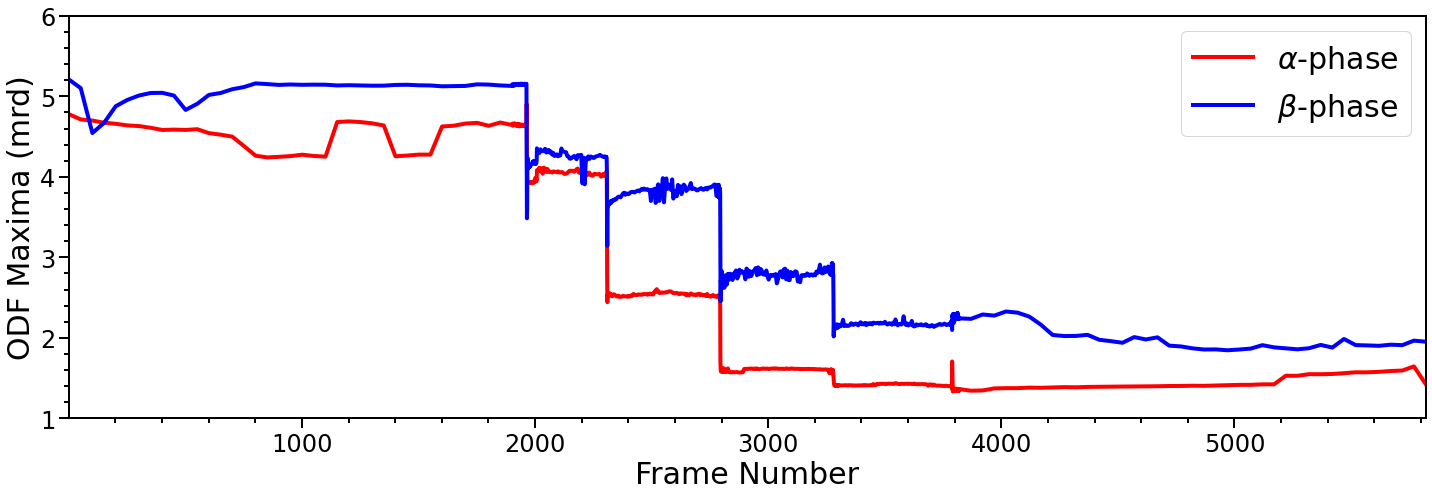

In [98]:
sxrd_experiment_number = config["user_inputs"]["sxrd_experiment_number"]
print("The SXRD experiment number is: ", sxrd_experiment_number, sep = '\n', end = '\n\n')

output_folder = config["file_paths"]["output_folder"].format(experiment_number = sxrd_experiment_number)
print("The output folder is: ", output_folder, sep = '\n', end = '\n\n')

fitting_type = "cpf"

texture_strength_type = "texture_index"
x_min = 1
x_max = cpf_alpha_results["image_number"][-1]
y_min = 1
y_max = 2
legend_location = "upper right"

functions.plot_texture_strength_two_phase(output_folder, sxrd_experiment_number, cpf_alpha_results, cpf_beta_results, 
                                          texture_strength_type,  fitting_type,
                                          x_min, x_max, y_min, y_max, legend_location)

texture_strength_type = "odf_max"
y_min = 1
y_max = 6
legend_location = "upper right"

functions.plot_texture_strength_two_phase(output_folder, sxrd_experiment_number, cpf_alpha_results, cpf_beta_results, 
                                          texture_strength_type,  fitting_type,
                                          x_min, x_max, y_min, y_max, legend_location)

We can also plot how the pole figure intensity maxima in both the ${\alpha}$ and ${\beta}$ phases change over time, versus image number, during the high temperature loading.

The first phase is: 
alpha

Figure saved to: ../../SXRD_results/desy_2020/texture_strength/cpf/018_alpha_pf_max_cpf.png
The second phase is: 
beta

Figure saved to: ../../SXRD_results/desy_2020/texture_strength/cpf/018_beta_pf_max_cpf.png


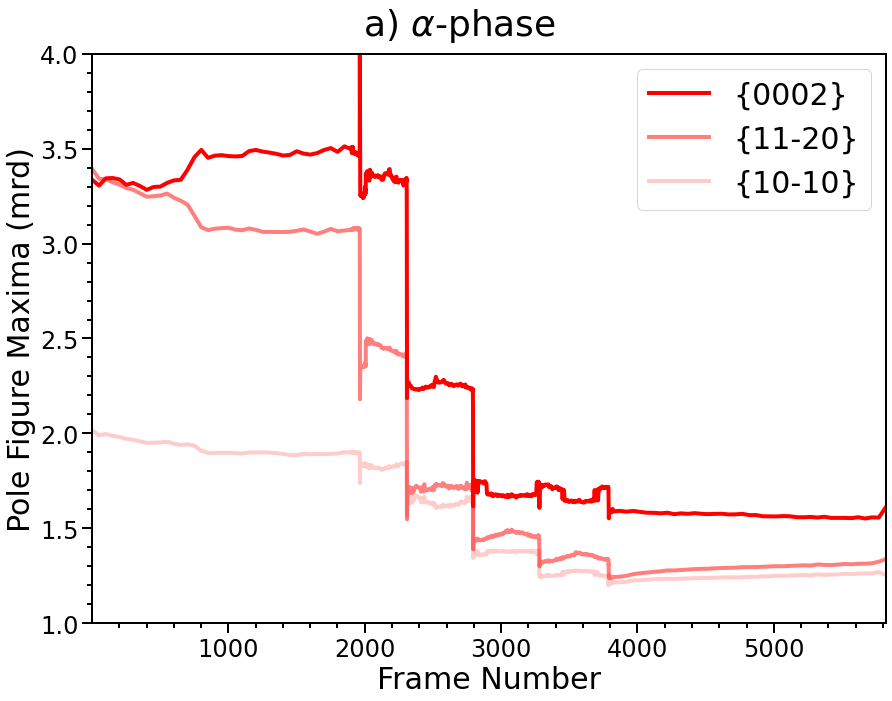

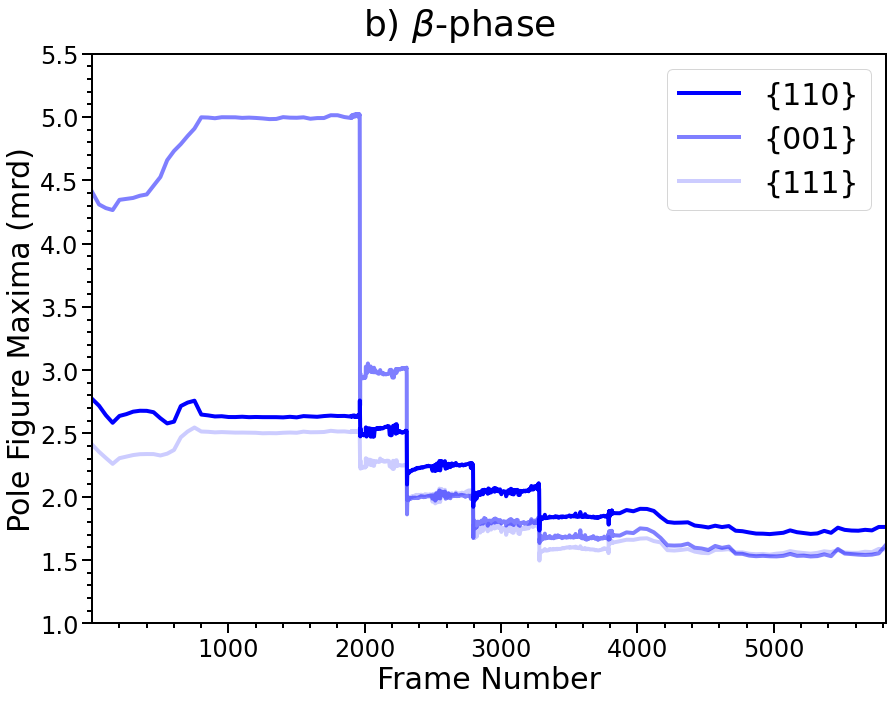

In [105]:
phase_1 = config["user_inputs"]["phase_1"]
print("The first phase is: ", phase_1, sep = '\n', end = '\n\n')

y_min = 1
y_max = 4
legend_location = "upper right"

functions.plot_pf_intensity_two_phase(output_folder, sxrd_experiment_number, 
                                phase_1, cpf_alpha_results, fitting_type,
                                x_min, x_max, y_min, y_max, legend_location)

phase_2 = config["user_inputs"]["phase_2"]
print("The second phase is: ", phase_2, sep = '\n', end = '\n\n')

y_min = 1
y_max = 5.5
legend_location = "upper right"

functions.plot_pf_intensity_two_phase(output_folder, sxrd_experiment_number, 
                                phase_2, cpf_beta_results, fitting_type,
                                x_min, x_max, y_min, y_max, legend_location)